In [124]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

## data monthly wage

In [125]:
data_wage = pd.read_csv("./data/monthly-wage.csv", sep=";")

In [126]:
data_wage.head()

,Month,Real wage
0,1993-01,100.00
1,1993-02,99.04
2,1993-03,101.77
3,1993-04,110.05
4,1993-05,115.47


In [127]:
data_wage.Month = data_wage.Month.apply(lambda x: datetime.strptime(x, "%Y-%m"))

In [128]:
import time

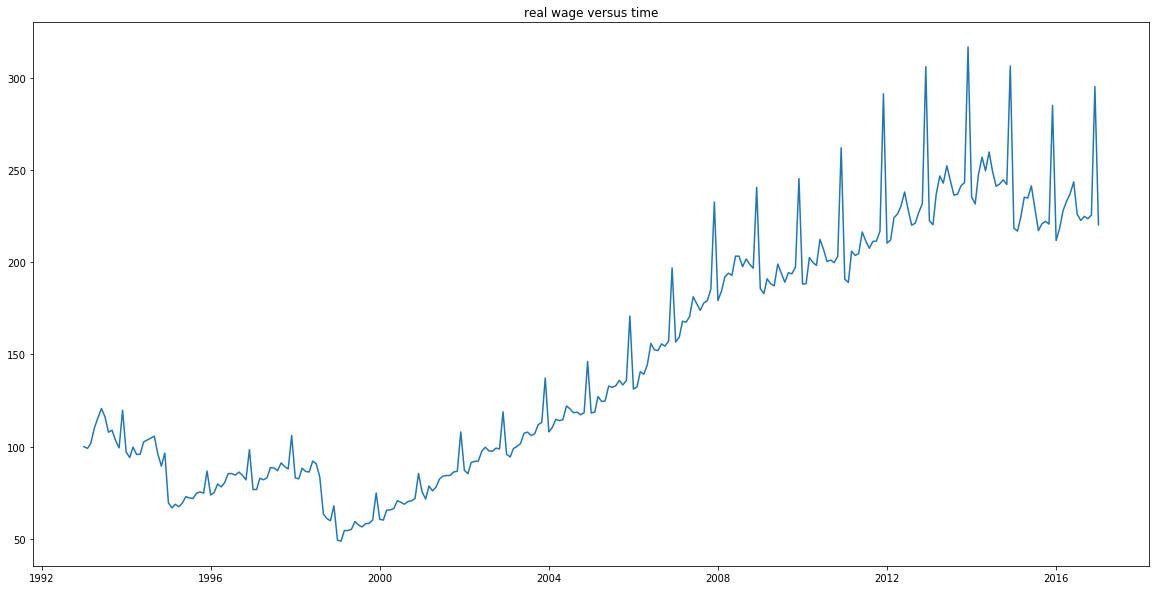

In [129]:
plt.title("real wage versus time")
plt.plot(data_wage.Month, data_wage["Real wage"]);

## data energy consumption

In [130]:
data_energy = pd.read_csv("./data/energy_consump.csv")

In [131]:
data_energy.head()

,Hub,ZSP,Date,EnergyConsump,Temp1,Temp2,Temp3,Temp4,Temp5,Temp6,...,Saturday,Sunday,Temp1_South_Less,Temp2_South_Less,Temp3_South_Less,Temp4_South_Less,Temp1_South_Gr,Temp2_South_Gr,Temp3_South_Gr,Temp4_South_Gr
0,Center,FZSZOE27,2010-01-01,147487.171,-17.8,-16.9,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Center,FZSZOE27,2010-01-02,155433.800,-17.8,-20.3,NaN,NaN,NaN,NaN,...,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Center,FZSZOE27,2010-01-03,164140.232,-16.4,-24.0,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Center,FZSZOE27,2010-01-04,171382.848,-10.2,-15.7,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Center,FZSZOE27,2010-01-05,170188.290,-7.2,-8.8,NaN,NaN,NaN,NaN,...,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
data_energy.Date = data_energy.Date.apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

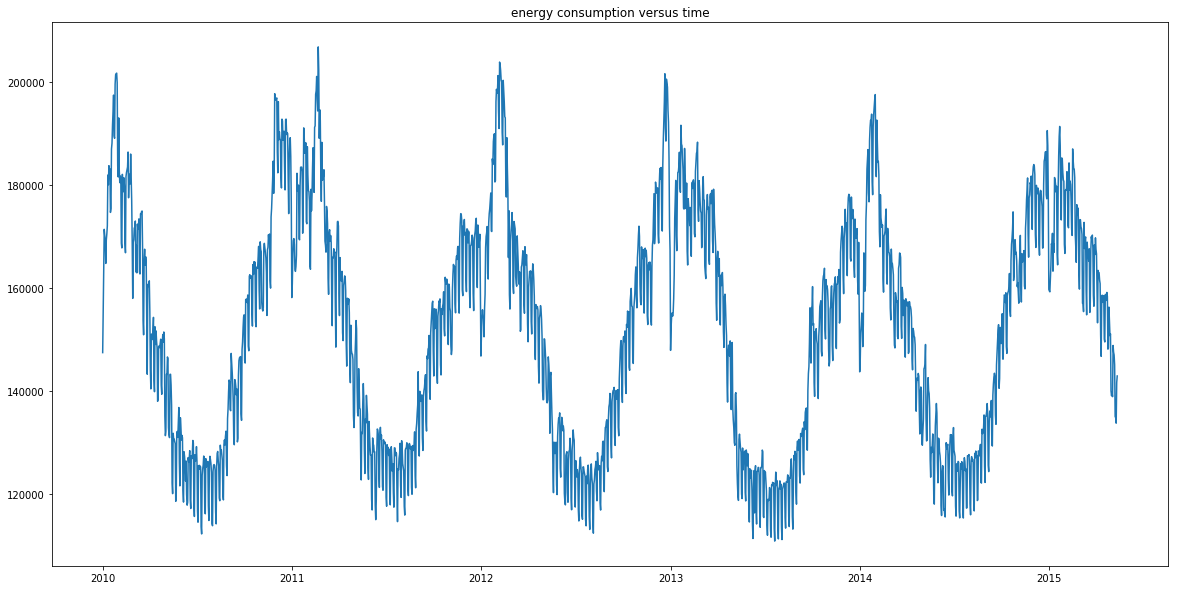

In [133]:
plt.title("energy consumption versus time")
plt.plot(data_energy.Date, data_energy.EnergyConsump);

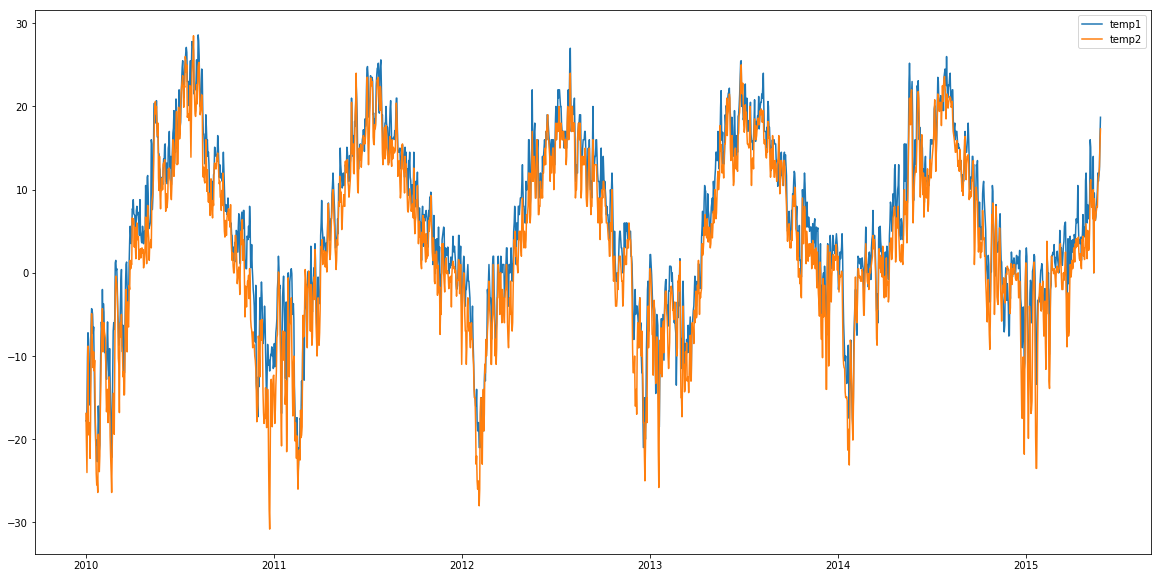

In [134]:
plt.plot(data_energy.Date, data_energy.Temp1, label="temp1")
plt.plot(data_energy.Date, data_energy.Temp2, label="temp2")
plt.legend();

## data item sales with missing data

In [135]:
data_item = pd.read_csv("./data/TimeSeries_Data10.csv")

In [136]:
data_item.head()

,Dates,Item: 165,Item: 969,Item: 2653,Item: 2654,Item: 2692,Item: 2695,Item: 2697,Item: 2765,Item: 2767,Item: 2806,Item: 2808
0,11.01.2005,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12.01.2005,NaN,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13.01.2005,NaN,2.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,14.01.2005,NaN,42.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,15.01.2005,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
data_item.Dates = data_item.Dates.apply(lambda x: datetime.strptime(x, "%d.%m.%Y"))

In [138]:
item_names = list(data_item.columns)[1:]

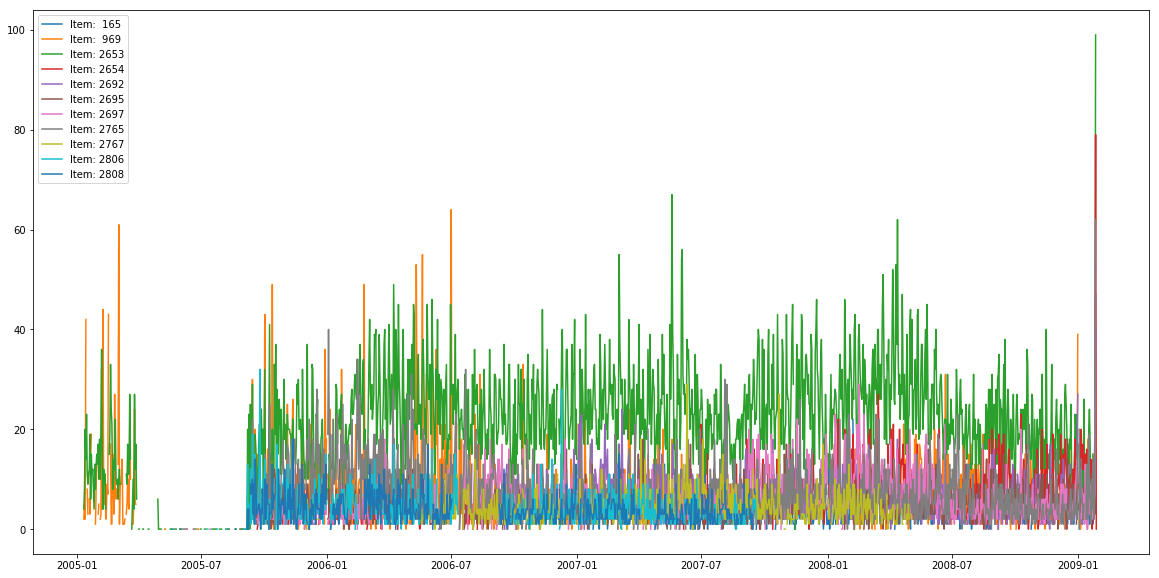

In [139]:
line_objects = plt.plot(data_item.Dates, data_item[item_names])
plt.legend(iter(line_objects), item_names);

## montly temperature

In [140]:
data_temp = pd.read_csv("./data/monthly-temperature-in-england-f.csv", sep=",")

In [141]:
data_temp.head()

,Month,"Monthly temperature in England (F), 1723-1970"
0,1723-01,1.1
1,1723-02,4.4
2,1723-03,7.5
3,1723-04,8.9
4,1723-05,11.7


In [142]:
data_temp.Month = data_temp.Month.apply(lambda x: datetime.strptime(x, "%Y-%m"))

In [143]:
data_temp.columns = ["Month", "temp"]
def parse_temp(x):
    if x[0] == '?': return float(x[1:])
    else: return float(x)
data_temp.temp = data_temp.temp.apply(parse_temp)

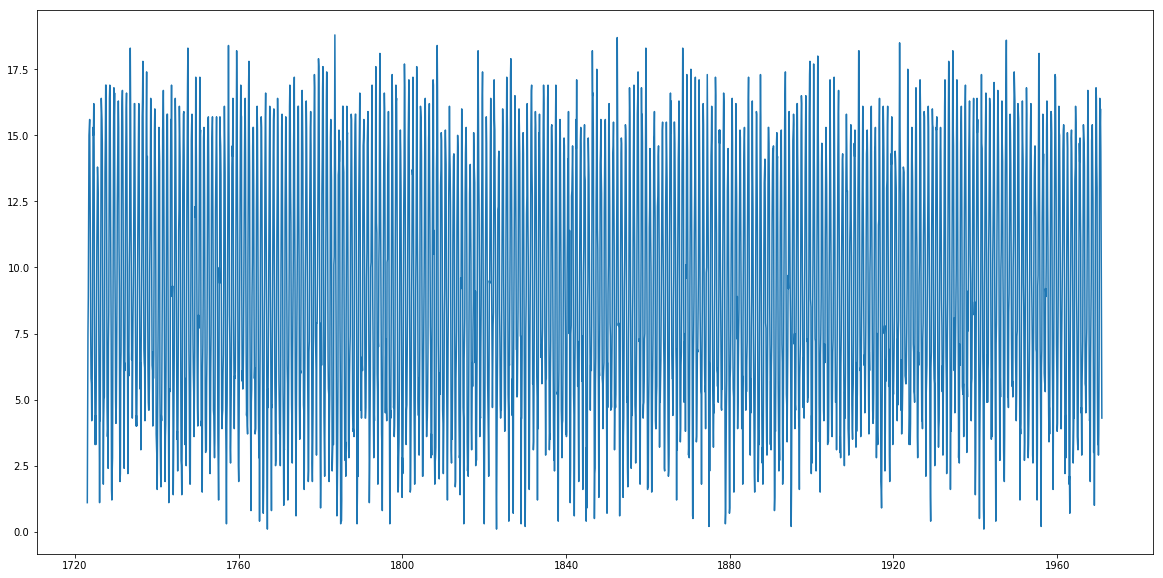

In [144]:
plt.plot(data_temp.Month, data_temp.temp);

## data price of currency 

In [145]:
data_price = pd.read_csv("./data/price_data.csv")

In [146]:
data_price.head()

,id,amount,price,timestamp,type
0,138712293,0.020000,29038.5,1558453201,sell
1,138712292,0.020000,29038.5,1558453201,sell
2,138712317,0.251731,29031.5,1558453201,sell
3,138712316,0.030000,29034.8,1558453201,sell
4,138712315,0.020000,29034.8,1558453201,sell


In [147]:
data_price["datetime"] = data_price.timestamp.apply(lambda x: datetime.fromtimestamp(x))

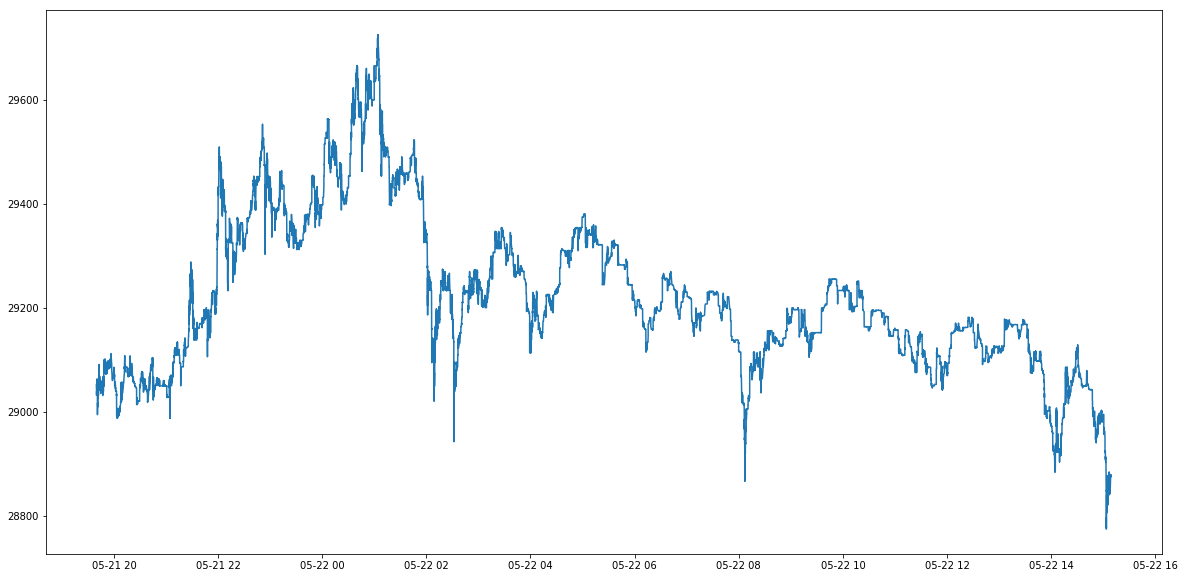

In [148]:
plt.plot(data_price.datetime, data_price.price);

## stl decomposition

In [149]:
import statsmodels.api as sm

res = sm.tsa.seasonal_decompose(data_wage["Real wage"], freq=12,
                                model="multiplicative")

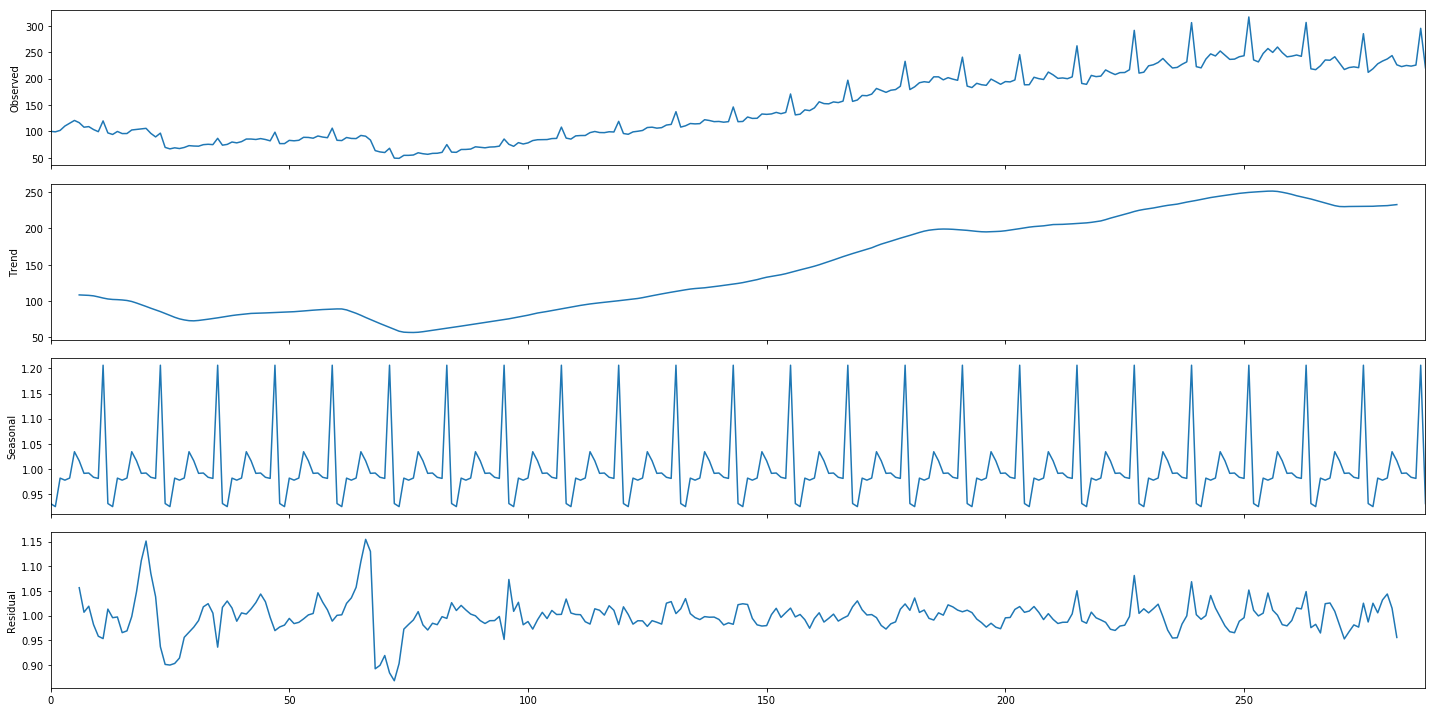

In [150]:
res.plot();

In [151]:
import numpy as np

In [152]:
class MA:
    def __init__(self, window=30):
        self.window = window
        
    def smooth(self, data):
        smoothed_data = []
        for index, _ in enumerate(data):
            start = max([index-self.window-1, 0])
            smoothed_data.append(np.mean(data[start:index]))
        return smoothed_data 

In [153]:
class SES:
    def __init__(self, alpha=0.3):
        self.alpha = alpha
    
    def smooth(self, data):
        smoothed_data = []
        for index, datum in enumerate(data):
            if index == 0: l = datum
            l = self.alpha * datum + (1-self.alpha) * l
            smoothed_data.append(l)
        return smoothed_data

In [154]:
data = data_energy.EnergyConsump.values

In [155]:
ma = MA(35)
ses = SES(0.1)

In [156]:
smoothed_data_ma = ma.smooth(data)
smoothed_data_ses = ses.smooth(data)

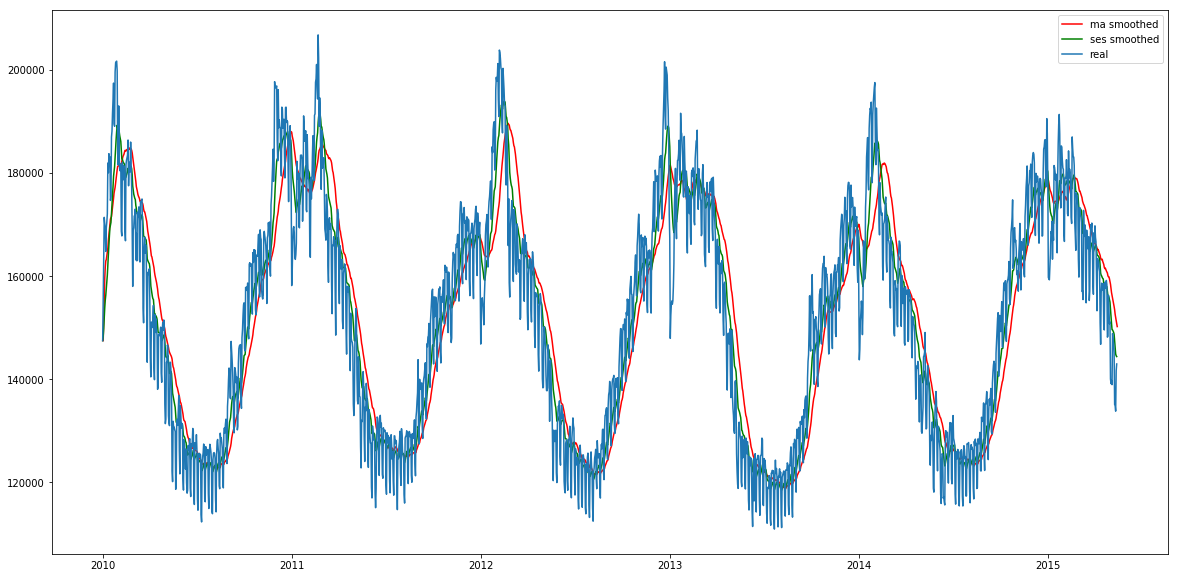

In [157]:
plt.plot(data_energy.Date, smoothed_data_ma, "r", label="ma smoothed")
plt.plot(data_energy.Date, smoothed_data_ses, "g", label="ses smoothed")
plt.plot(data_energy.Date, data, label="real")
plt.legend();

In [225]:
class TSAA:
    def __init__(self, period, alpha, beta, gamma):
        self.period = period
        self.alpha = alpha
        self.beta = beta
        self.gamma = gamma
        
    def smooth(self, data):
        l = np.zeros(len(data)+1)
        b = np.zeros(len(data)+1)
        s = np.zeros(len(data)+1)
        smoothed_data = []
        for i, datum  in enumerate(data):
            smoothed_data.append(l[i] + b[i] + s[np.max([0, i-self.period])])
            l[i+1] = (1-self.alpha)*l[i]+self.alpha*(data[i]-s[i-self.period])
            b[i+1] = (1-self.beta)*b[i]+self.beta*(l[i+1]-l[i])
            s[i+1] = (1-self.gamma)*s[np.max([0, i+1-self.period])]+self.gamma*(data[i]-l[i+1])
        n = data - smoothed_data
        
            
        return smoothed_data, s, l, n
                                 
            
        

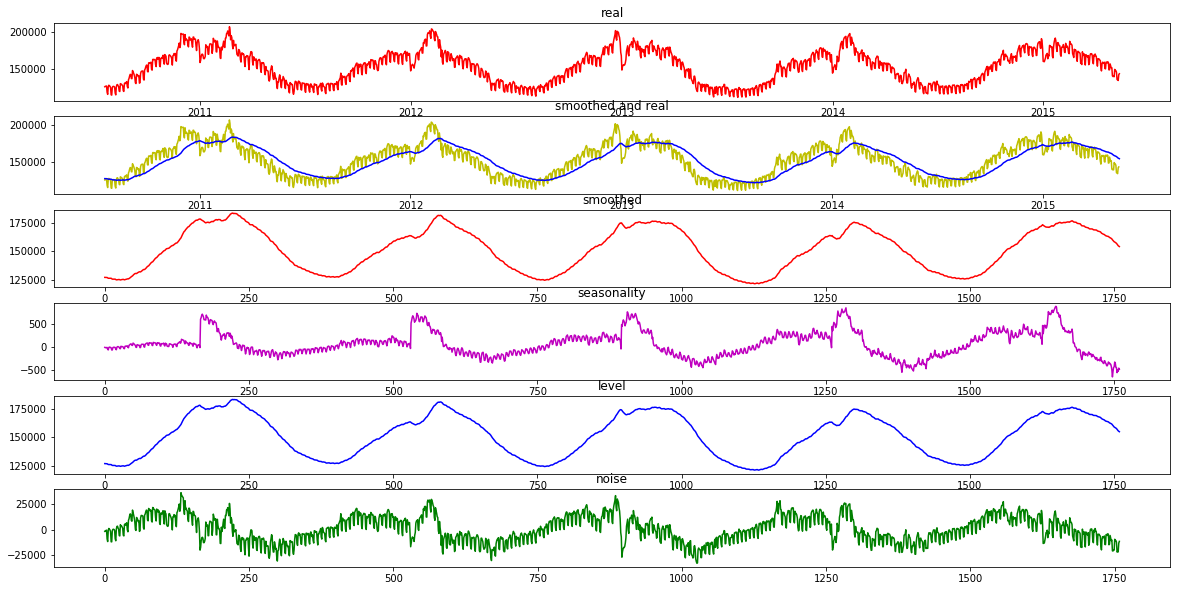

In [226]:
tsaa = TSAA(365, 0.03, 0.1, 0.005)
smoothed_data_tsa, seasonality, level, noise= tsaa.smooth(data)

warm_up = 200

plt.subplot(6,1,1)
plt.plot(data_energy.Date[warm_up:], data[warm_up:],"r")
plt.title("real")

plt.subplot(6,1,2)
plt.plot(data_energy.Date[warm_up:], data[warm_up:],"y")
plt.plot(data_energy.Date[warm_up:], smoothed_data_tsa[warm_up:], "b")
plt.title('smoothed and real')

plt.subplot(6,1,3)
plt.plot(range(len(smoothed_data_tsa[warm_up:])), smoothed_data_tsa[warm_up:],"r")
plt.title("smoothed")

plt.subplot(6,1,4)
plt.plot(range(len(seasonality[warm_up:])), seasonality[warm_up:], "m")
plt.title('seasonality')

plt.subplot(6,1,5)
plt.plot(range(len(level[warm_up:])), level[warm_up:], "b")
plt.title('level')

plt.subplot(6,1,6)
plt.plot(range(len(noise[warm_up:])), noise[warm_up:], "g")
plt.title('noise')

plt.show()

In [227]:
class TSMA:
    def __init__(self, period, alpha, gamma):
        self.period = period
        self.alpha = alpha
        self.gamma = gamma
        
    def smooth(self, data):
        l = np.ones(len(data)+1)
        s = np.ones(len(data)+1)
        smoothed_data = []
        for i, datum  in enumerate(data):
            smoothed_data.append(l[i]*s[np.max([0, i-self.period])])
            l[i+1] = (1-self.alpha)*l[i]+self.alpha*(data[i]/s[i-self.period])
            s[i+1] = (1-self.gamma)*s[np.max([0, i+1-self.period])]+self.gamma*(data[i]/l[i+1])
        n = data - smoothed_data
        
            
        return smoothed_data, s, l, n
         
        

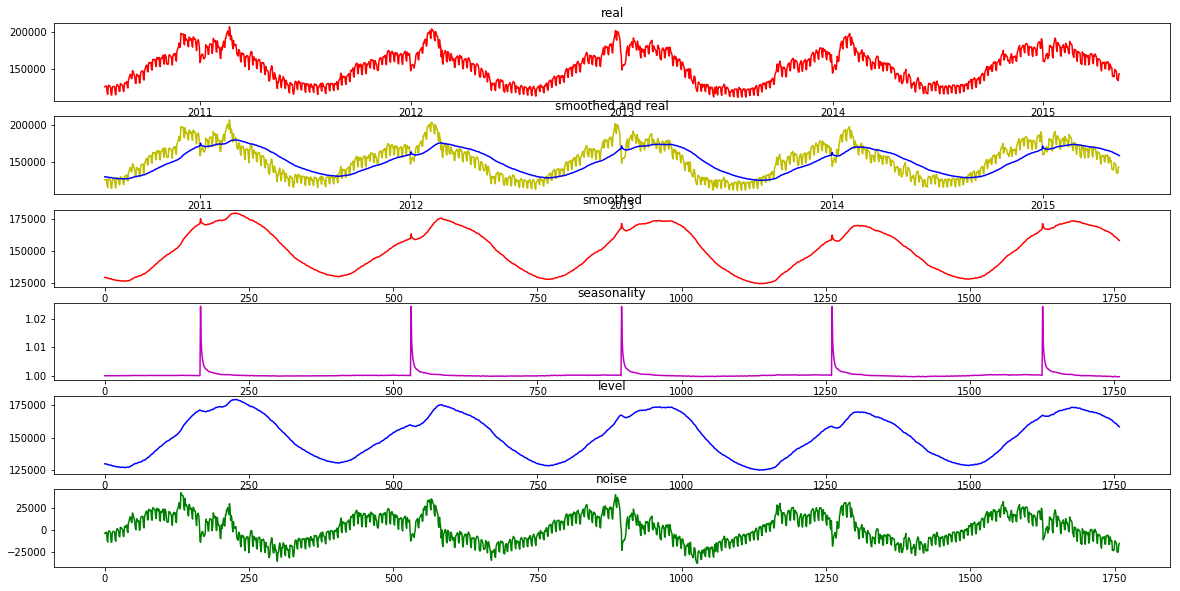

In [228]:
tsma = TSMA(365, 0.02, 0.0005)
smoothed_data_tsa, seasonality, level, noise= tsma.smooth(data)

warm_up = 200

plt.subplot(6,1,1)
plt.plot(data_energy.Date[warm_up:], data[warm_up:],"r")
plt.title("real")

plt.subplot(6,1,2)
plt.plot(data_energy.Date[warm_up:], data[warm_up:],"y")
plt.plot(data_energy.Date[warm_up:], smoothed_data_tsa[warm_up:], "b")
plt.title('smoothed and real')

plt.subplot(6,1,3)
plt.plot(range(len(smoothed_data_tsa[warm_up:])), smoothed_data_tsa[warm_up:],"r")
plt.title("smoothed")

plt.subplot(6,1,4)
plt.plot(range(len(seasonality[warm_up:])), seasonality[warm_up:], "m")
plt.title('seasonality')

plt.subplot(6,1,5)
plt.plot(range(len(level[warm_up:])), level[warm_up:], "b")
plt.title('level')

plt.subplot(6,1,6)
plt.plot(range(len(noise[warm_up:])), noise[warm_up:], "g")
plt.title('noise')

plt.show()